# Classification - Predict Salary group 



## Dataset

https://archive.ics.uci.edu/ml/datasets/Adult

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Attribute Information:

## Listing of attributes: 

Labels : >50K, <=50K. 

age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Scope of this notebook

In this notebook, various classification algorithms are fed the training data (part of entire set) and the scores are compared. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adults = pd.read_csv('adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])
adults_test = pd.read_csv('adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])

In [3]:
train_data = adults.drop('label',axis=1)

test_data = adults_test.drop('label',axis=1)

data = train_data.append(test_data)

label = adults['label'].append(adults_test['label'])

In [4]:
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
full_dataset = adults.append(adults_test)

In [6]:
label.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: label, dtype: object

In [7]:
data_binary = pd.get_dummies(data)

data_binary.head()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_binary,label)

In [9]:
performance = []

In [10]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [11]:
 # Binary data
GNB.fit(x_train,y_train)
train_score = GNB.score(x_train,y_train)
test_score = GNB.score(x_test,y_test)
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.794987817612252 - Test score - 0.7956513727658007


In [12]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression


logClassifier = LogisticRegression()

In [13]:
logClassifier.fit(x_train,y_train)
train_score = logClassifier.score(x_train,y_train)
test_score = logClassifier.score(x_test,y_test)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression : Training score - 0.7979975839970517 - Test score - 0.798292488176402


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_scores = []



KNN : Training score - 0.9999590507974857 -- Test score - 0.9393157668447885
KNN : Training score - 0.9471960033578346 -- Test score - 0.7815244763835145
KNN : Training score - 0.8633934604123584 -- Test score - 0.8195442540384498
KNN : Training score - 0.8457034049261891 -- Test score - 0.7919046741600638
KNN : Training score - 0.8317397268688193 -- Test score - 0.80603157054235
KNN : Training score - 0.8249216846501914 -- Test score - 0.7992138075056815
KNN : Training score - 0.8191478470956778 -- Test score - 0.8022848719366132
KNN : Training score - 0.8138653999713356 -- Test score - 0.8010564461642405
KNN : Training score - 0.8122069572695072 -- Test score - 0.8035747189976046
KNN : Training score - 0.8103028193525931 -- Test score - 0.8031447699772741


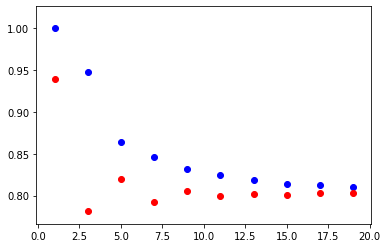

In [16]:
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    train_score = knn.score(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn.score(x_train,y_train)

train_score = knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

K Neighbors : Training score - 0.8633934604123584 - Test score - 0.8195442540384498


In [18]:
performance

[{'algorithm': 'Gaussian Naive Bayes',
  'training_score': 0.794987817612252,
  'testing_score': 0.7956513727658007},
 {'algorithm': 'LogisticRegression',
  'training_score': 0.7979975839970517,
  'testing_score': 0.798292488176402},
 {'algorithm': 'K Neighbors',
  'training_score': 0.8633934604123584,
  'testing_score': 0.8195442540384498}]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rndTree = RandomForestClassifier(n_estimators=15)
rndTree.fit(x_train,y_train)
print(rndTree.score(x_test,y_test))
print(rndTree.score(x_train,y_train))
train_score = rndTree.score(x_train,y_train)
test_score = rndTree.score(x_test,y_test)
# print(f'Random Forests : Training score - {train_score} - Test score - {test_score}')
performance.append({'algorithm':'Random Forests', 'training_score':train_score, 'testing_score':test_score})

In [24]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_binary,label)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
x_train_scaled = scaler.transform(x_train)

In [26]:
x_test_scaled = scaler.transform(x_test)

In [27]:
svc.fit(x_train_scaled,y_train)

KeyboardInterrupt: 

In [ ]:
svc.score(x_test_scaled,y_test)

In [ ]:
from sklearn import Tree
dct=DecisionTreeClassifier()
dct.fit(X_test,y_test)
print(dct.score)